<a href="https://colab.research.google.com/github/vitoriamsj/portfolio_data_science/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Importação dos dados

Antes de iniciar qualquer análise, vamos identificar e entender nossa base de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv')

df.head()


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [5]:
print ('Dimensões do DataSet', '\n Entradas:',df.shape[0],'\n Colunas:',df.shape[1])


Dimensões do DataSet 
 Entradas: 24023 
 Colunas: 33


A base possui 24023 entradas, e 33 variáveis.

Vamos identificar as colunas presentes na base.

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [7]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Suas variáveis são divididas em **floats** e **objects**.

Vamos verificar se a base possui valores nulos, e qual a porcentagem referente para cada coluna.

In [8]:
print ('Porcentagem de  valores nulos\n',round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)*100)

Porcentagem de  valores nulos
 new_tests                          76.0
new_tests_per_thousand             76.0
total_tests                        73.0
total_tests_per_thousand           73.0
new_tests_smoothed                 71.0
new_tests_smoothed_per_thousand    71.0
tests_units                        68.0
handwashing_facilities             60.0
extreme_poverty                    40.0
male_smokers                       28.0
female_smokers                     27.0
stringency_index                   21.0
hospital_beds_per_thousand         17.0
aged_65_older                      11.0
gdp_per_capita                     10.0
aged_70_older                      10.0
median_age                          9.0
cvd_death_rate                      9.0
diabetes_prevalence                 6.0
population_density                  4.0
new_cases_per_million               1.0
new_deaths_per_million              1.0
total_deaths_per_million            1.0
total_cases_per_million             1.0
continent

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.date.max()

Timestamp('2020-06-15 00:00:00')

A data mais recente importada é o dia 15 de junho de 2020. Vamos analisar os dados referentes a este dia.

In [11]:
df.loc[df.date == '2020-06-15 00:00:00'].sort_values(by='total_cases',ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,55.583,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,349.641,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
18171,RUS,Europe,Russia,2020-06-15,528964.0,8835.0,6948.0,119.0,3624.668,60.541,47.610,0.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
10141,IND,Asia,India,2020-06-15,332424.0,11502.0,9520.0,325.0,240.886,8.335,6.899,0.236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,VGB,North America,British Virgin Islands,2020-06-15,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
17012,PNG,Oceania,Papua New Guinea,2020-06-15,8.0,0.0,0.0,0.0,0.894,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN
2925,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-15,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12602,LSO,Africa,Lesotho,2020-06-15,4.0,0.0,0.0,0.0,1.867,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142252e+06,73.562,22.2,4.506,2.647,2851.153,59.6,405.126,3.94,0.400,53.900,2.117,NaN


Pudemos verificar que os países líderes em casos aos 15 de Junho de 2020 eram:

* Estados Unidos - 2.094.069 casos
* Brasil - 867.624 casos
* Russia - 528.964 casos

Agora, vamos verificar os casos de morte.

In [12]:
df.loc[df.date=='2020-06-15 00:00:00'].sort_values(by='total_deaths', ascending = False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,55.583,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,349.641,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
22706,GBR,Europe,United Kingdom,2020-06-15,295889.0,1514.0,41698.0,36.0,4358.616,22.302,614.236,0.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540
11226,ITA,Europe,Italy,2020-06-15,236989.0,338.0,34345.0,44.0,3919.647,5.590,568.044,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,PYF,Oceania,French Polynesia,2020-06-15,60.0,0.0,0.0,0.0,213.596,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN
7504,FJI,Oceania,Fiji,2020-06-15,18.0,0.0,0.0,0.0,20.079,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964440e+05,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300
18439,LCA,North America,Saint Lucia,2020-06-15,19.0,0.0,0.0,0.0,103.469,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.836290e+05,293.187,34.9,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.300
7416,FLK,South America,Falkland Islands,2020-06-15,13.0,0.0,0.0,0.0,3732.415,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em relação às mortes, os países que lideravam aos 15 de Junho de 2020 eram:

* Estados Unidos - 115.732
* Brasil - 43.332
* Grã-Bretanha - 41.698

Para melhorar a visualização, vamos plotar um gráfico de barras.

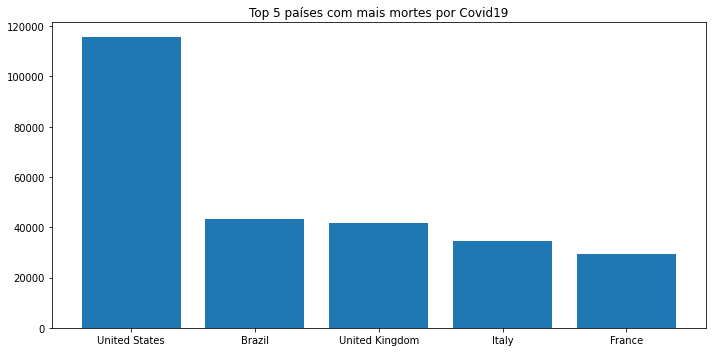

In [13]:
df_top_5_total_deaths = df.loc[df.date == '2020-06-15', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location','total_deaths', data = df_top_5_total_deaths)

ax.set_title('Top 5 países com mais mortes por Covid19')

plt.tight_layout()


Observamos que os Estados Unidos 'lidera' o número de casos e de mortos por COVID-19.

# Evolução COVID no Mundo

Vamos analisar a evolução da covid19 no mundo.

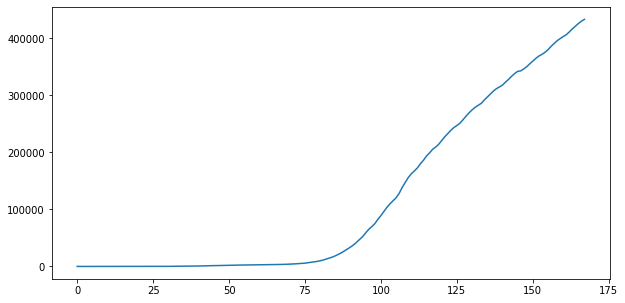

In [14]:
df.loc[df.location == 'World','total_deaths'].reset_index(drop=True).plot(figsize=(10,5));

In [59]:
df.loc[df.date == '2020-06-15'].groupby('continent').total_cases.sum().sort_values(ascending=False)

continent
North America    2423237.0
Europe           1915876.0
Asia             1621711.0
South America    1424861.0
Africa            243125.0
Oceania             8796.0
Name: total_cases, dtype: float64

In [64]:
df.loc[df.date == '2020-06-15'].groupby('continent').total_deaths.sum().sort_values(ascending=False)

continent
Europe           155438.0
North America    143268.0
South America     60424.0
Asia              40332.0
Africa             6523.0
Oceania             131.0
Name: total_deaths, dtype: float64

O número de casos e mortes continua crescente em todo o mundo. 

* O continente com mais casos é o Norte Americano;
* O continente com mais mortes é o Europeu;
* O continente com menos casos e mortes é a Oceania.

In [45]:
df.loc[df.date == '2020-06-15'].groupby('continent').handwashing_facilities.sum().sort_values(ascending=False)

continent
Asia             1779.323
Africa           1106.832
North America    1008.037
South America     395.944
Europe            281.862
Oceania             0.000
Name: handwashing_facilities, dtype: float64

O continente com mais instalações de lavagem das mãos e ferramentas de higiene é o Asiático. 

Importante obervar que o continente com **mais casos de mortes** por covid também é o continente com **menos instalações de lavagem das mãos**.

### Análise Exploratória para o Brasil

Vamos analisar a COVID-19 no Brasil.

In [15]:
df_brasil = df.loc[df.location == 'Brazil'].copy()

Vamos verificar as 5 primeiras linhas da base relacionada ao Brasil.

In [16]:
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3097,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3098,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3099,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3100,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3101,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


Da mesma maneira que fizemos antes, vamos encontrar a data mais recente, mas dessa vez em relação ao nosso país.

In [17]:
df_brasil.date.max()

Timestamp('2020-06-15 00:00:00')

In [18]:
df_brasil.loc[df_brasil.date == '2020-06-15']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


Até junho de 2020 o Brasil acumulava 43332 mortos por covid19 e 867624 casos.

Vamos verificar a data do primeiro caso e morte da doença.

In [19]:
df_brasil.loc[df_brasil.new_deaths != 0.0]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3175,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3176,BRA,South America,Brazil,2020-03-19,428.0,137.0,4.0,3.0,2.014,0.645,0.019,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3177,BRA,South America,Brazil,2020-03-20,621.0,193.0,6.0,2.0,2.922,0.908,0.028,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3178,BRA,South America,Brazil,2020-03-21,904.0,283.0,11.0,5.0,4.253,1.331,0.052,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3179,BRA,South America,Brazil,2020-03-22,1128.0,224.0,18.0,7.0,5.307,1.054,0.085,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,BRA,South America,Brazil,2020-06-11,772416.0,32913.0,39680.0,1274.0,3633.883,154.841,186.677,5.994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3261,BRA,South America,Brazil,2020-06-12,802828.0,30412.0,40919.0,1239.0,3776.958,143.075,192.506,5.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3262,BRA,South America,Brazil,2020-06-13,828810.0,25982.0,41828.0,909.0,3899.192,122.234,196.783,4.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3263,BRA,South America,Brazil,2020-06-14,850514.0,21704.0,42720.0,892.0,4001.300,102.108,200.979,4.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


Acima podemos verificar que o primeiro caso de morte por covid19 no Brasil foi em 2020-03-18. (Dia 18 de março de 2020)

Quanto tempo será que levou do primeiro caso até a primeira morte por covid 19? Vamos verificar?

In [20]:
df_brasil.loc[df_brasil.new_cases!= 0.0]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3154,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3158,BRA,South America,Brazil,2020-03-01,2.0,1.0,0.0,0.0,0.009,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3162,BRA,South America,Brazil,2020-03-05,3.0,1.0,0.0,0.0,0.014,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3163,BRA,South America,Brazil,2020-03-06,8.0,5.0,0.0,0.0,0.038,0.024,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3164,BRA,South America,Brazil,2020-03-07,13.0,5.0,0.0,0.0,0.061,0.024,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,BRA,South America,Brazil,2020-06-11,772416.0,32913.0,39680.0,1274.0,3633.883,154.841,186.677,5.994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3261,BRA,South America,Brazil,2020-06-12,802828.0,30412.0,40919.0,1239.0,3776.958,143.075,192.506,5.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3262,BRA,South America,Brazil,2020-06-13,828810.0,25982.0,41828.0,909.0,3899.192,122.234,196.783,4.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3263,BRA,South America,Brazil,2020-06-14,850514.0,21704.0,42720.0,892.0,4001.300,102.108,200.979,4.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


O primeiro caso de covid19 no Brasil foi em 2020-02-26. (Dia 26 Fereveiro de 2020)

In [22]:
df_brasil.date = pd.to_datetime(df_brasil.date)

diferença = df_brasil.date.loc[3175] - df_brasil.date.loc[3154]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(diferença.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


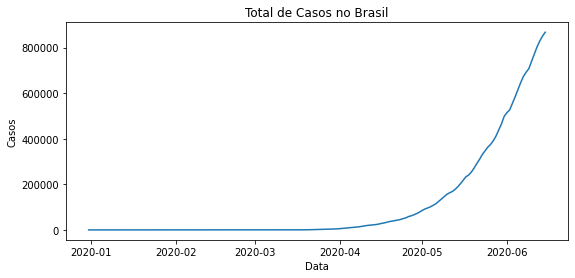

In [23]:
fig, ax = plt.subplots(figsize = (9,4))
x = df_brasil['date']
y = df_brasil['total_cases']

ax.plot(x,y);
ax.set_ylabel('Casos')
ax.set_xlabel('Data')
ax.set_title('Total de Casos no Brasil')
    
plt.show()

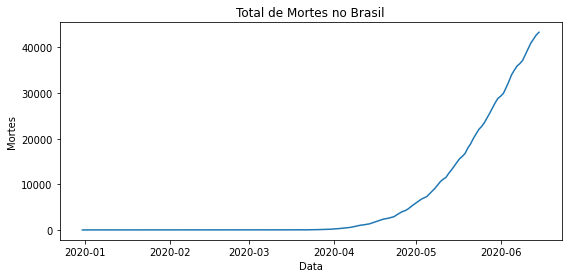

In [24]:
fig, ax = plt.subplots(figsize = (9,4))
x = df_brasil['date']
y = df_brasil['total_deaths']
ax.set_ylabel('Mortes')
ax.set_xlabel('Data')
ax.set_title('Total de Mortes no Brasil')
    
ax.plot(x,y);

## Conclusão

Após essa breve análise podemos concluir que:
* A doença continua crescente em todo o mundo;
* O uso de handwashing facilities realmente faz diferença na prevenção da doença;
* Os Estados Unidos lideram os casos de casos e morte por COVID-19. 
* O Brasil continua com um número crescente de casos e mortes.